# Case Técnico da Dadosfera

# Exploração/Dicionário de Dados

In [2]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_with_commas(x, _):
    return f"{int(x):,}"

In [3]:
df = pd.read_parquet('yellow_tripdata_2025-02.parquet')
df.to_csv('yellow_tripdata_2025-02.csv', index=False)

In [4]:
df = pd.read_parquet('yellow_tripdata_2025-02.parquet')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577543 entries, 0 to 3577542
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [ ]:
def gerar_data_dictionary(df):
    data_dictionary = []
    for col in df.columns:
        tipo = str(df[col].dtype)
        exemplo = df[col].dropna().iloc[0] if not df[col].dropna().empty else "Nenhum exemplo disponível"
        data_dictionary.append({
            "campo": col,
            "descricao": "Descrição pendente",
            "tipo": tipo,
            "formato": "-",
            "dominio": f"Ex.: {exemplo}",
            "observacoes": "-"
        })
    return data_dictionary

def gerar_markdown(data_dict):
    md = "| Campo | Descrição | Tipo | Formato | Domínio / Exemplo | Observações |\n"
    md += "|-------|------------|------|---------|-------------------|-------------|\n"
    for item in data_dict:
        md += f"| {item['campo']} | {item['descricao']} | {item['tipo']} | {item['formato']} | {item['dominio']} | {item['observacoes']} |\n"
    return md

data_dictionary = gerar_data_dictionary(df)
markdown = gerar_markdown(data_dictionary)

print(markdown)

| Campo | Descrição | Tipo | Formato | Domínio / Exemplo | Observações |
|-------|------------|------|---------|-------------------|-------------|
| VendorID | Descrição pendente | int32 | - | Ex.: 2 | - |
| tpep_pickup_datetime | Descrição pendente | datetime64[us] | - | Ex.: 2025-02-01 00:12:18 | - |
| tpep_dropoff_datetime | Descrição pendente | datetime64[us] | - | Ex.: 2025-02-01 00:32:33 | - |
| passenger_count | Descrição pendente | float64 | - | Ex.: 3.0 | - |
| trip_distance | Descrição pendente | float64 | - | Ex.: 3.12 | - |
| RatecodeID | Descrição pendente | float64 | - | Ex.: 1.0 | - |
| store_and_fwd_flag | Descrição pendente | object | - | Ex.: N | - |
| PULocationID | Descrição pendente | int32 | - | Ex.: 246 | - |
| DOLocationID | Descrição pendente | int32 | - | Ex.: 79 | - |
| payment_type | Descrição pendente | int64 | - | Ex.: 1 | - |
| fare_amount | Descrição pendente | float64 | - | Ex.: 19.8 | - |
| extra | Descrição pendente | float64 | - | Ex.: 1.0 | - |
| mt

# Análise/Visualização

## Análise das Categorias

  Pickup_Borough  Pickup_Count
0      Manhattan       3158871
1         Queens        291137
2       Brooklyn         96815
3          Bronx         21466
4        Unknown          7470
5            N/A          1165
6            EWR           314
7  Staten Island           305


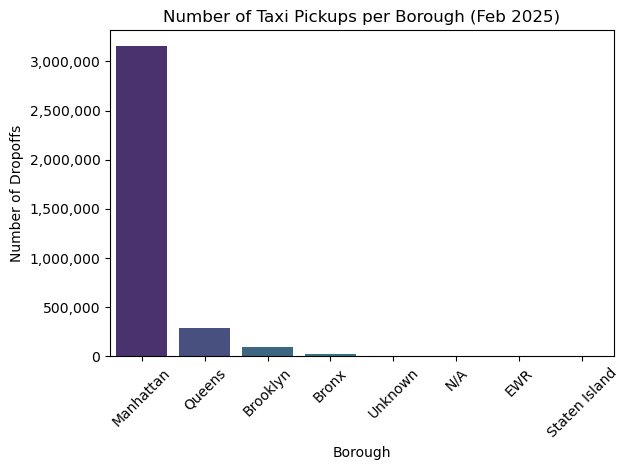

In [6]:
query ="""
SELECT 
    z.Borough AS Pickup_Borough,
    COUNT(*) AS Pickup_Count
FROM 'yellow_tripdata_2025-02.parquet' AS t
JOIN 'taxi_zone_lookup.csv' AS z
ON t.PULocationID = z.LocationID
GROUP BY z.Borough
ORDER BY Pickup_Count DESC
LIMIT 50
"""
pickup = duckdb.query(query).to_df()
print(pickup)

sns.barplot(
    data=pickup,
    x='Pickup_Borough',
    y='Pickup_Count',
    hue='Pickup_Borough',
    palette='viridis',
    legend=False
)

# Apply formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

# Labels and title
plt.title('Number of Taxi Pickups per Borough (Feb 2025)')
plt.xlabel('Borough')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  Dropoff_Borough  Dropoff_Count
0       Manhattan        3190416
1          Queens         170574
2        Brooklyn         162271
3           Bronx          26313
4             N/A          11049
5         Unknown          10236
6             EWR           5966
7   Staten Island            718


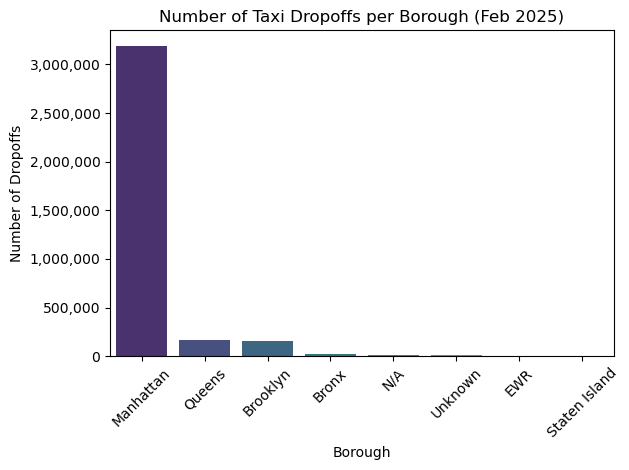

In [7]:
query ="""
SELECT 
    z.Borough AS Dropoff_Borough,
    COUNT(*) AS Dropoff_Count
FROM 'yellow_tripdata_2025-02.parquet' AS t
JOIN 'taxi_zone_lookup.csv' AS z
ON t.DOLocationID = z.LocationID
GROUP BY z.Borough
ORDER BY Dropoff_Count DESC
LIMIT 50
"""
dropoff = duckdb.query(query).to_df()
print(dropoff)

sns.barplot(
    data=dropoff,
    x='Dropoff_Borough',
    y='Dropoff_Count',
    hue='Dropoff_Borough',
    palette='viridis',
    legend=False
)

# Apply formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

# Labels and title
plt.title('Number of Taxi Dropoffs per Borough (Feb 2025)')
plt.xlabel('Borough')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                     Pickup_Zone Pickup_Borough  Pickup_Count
0                 Midtown Center      Manhattan        161411
1          Upper East Side South      Manhattan        157293
2          Upper East Side North      Manhattan        148093
3                    JFK Airport         Queens        125463
4      Times Sq/Theatre District      Manhattan        114528
5                   Midtown East      Manhattan        113721
6   Penn Station/Madison Sq West      Manhattan        113389
7            Lincoln Square East      Manhattan        104359
8                       Union Sq      Manhattan        102637
9                    Murray Hill      Manhattan         97271
10                  East Chelsea      Manhattan         96956
11                  East Village      Manhattan         96580
12                 Midtown North      Manhattan         94074
13         Upper West Side South      Manhattan         93951
14                  West Village      Manhattan         86263
15      

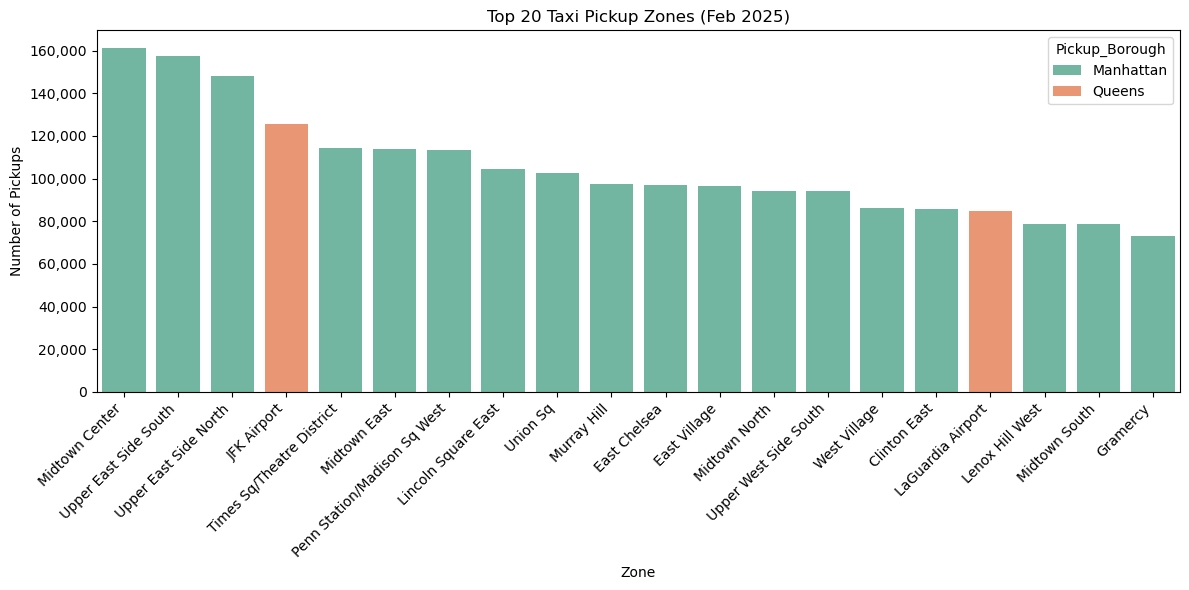

In [8]:
query ="""
SELECT 
    z.Zone AS Pickup_Zone,
    z.Borough AS Pickup_Borough,
    COUNT(*) AS Pickup_Count
FROM 'yellow_tripdata_2025-02.parquet' t
JOIN 'taxi_zone_lookup.csv' z
ON t.PULocationID = z.LocationID
GROUP BY t.PULocationID, z.Zone, z.Borough
ORDER BY Pickup_Count DESC
LIMIT 20
"""
pickup = duckdb.query(query).to_df()
print(pickup)

pickup_sorted = pickup.sort_values(by='Pickup_Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pickup_sorted,
    x='Pickup_Zone',
    y='Pickup_Count',
    hue='Pickup_Borough',
    palette='Set2'
)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

plt.title('Top 20 Taxi Pickup Zones (Feb 2025)')
plt.xlabel('Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                    Dropoff_Zone Dropoff_Borough  Dropoff_Count
0          Upper East Side North       Manhattan         153061
1          Upper East Side South       Manhattan         142652
2                 Midtown Center       Manhattan         124546
3      Times Sq/Theatre District       Manhattan         103342
4                    Murray Hill       Manhattan         101840
5          Upper West Side South       Manhattan          94357
6                   East Chelsea       Manhattan          94186
7            Lincoln Square East       Manhattan          93561
8                   Midtown East       Manhattan          91741
9                       Union Sq       Manhattan          90795
10               Lenox Hill West       Manhattan          90610
11                  East Village       Manhattan          86930
12                  Clinton East       Manhattan          85319
13                 Midtown North       Manhattan          83459
14         Upper West Side North       M

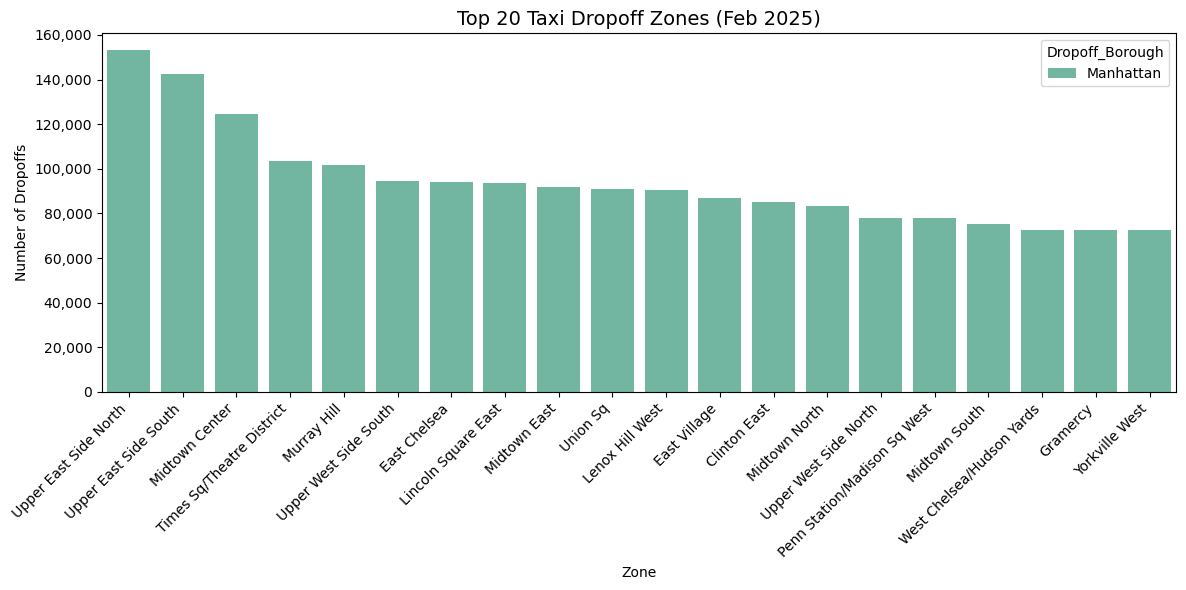

In [9]:
query ="""
SELECT 
    z.Zone AS Dropoff_Zone,
    z.Borough AS Dropoff_Borough,
    COUNT(*) AS Dropoff_Count
FROM 'yellow_tripdata_2025-02.parquet' AS t
JOIN 'taxi_zone_lookup.csv' AS z
ON t.DOLocationID = z.LocationID
GROUP BY t.DOLocationID, z.Zone, z.Borough
ORDER BY Dropoff_Count DESC
LIMIT 20
"""
dropoff = duckdb.query(query).to_df()
print(dropoff)

dropoff_sorted = dropoff.sort_values(by='Dropoff_Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=dropoff_sorted,
    x='Dropoff_Zone',
    y='Dropoff_Count',
    hue='Dropoff_Borough',
    palette='Set2'
)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

plt.title('Top 20 Taxi Dropoff Zones (Feb 2025)', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análise de Série Temporal

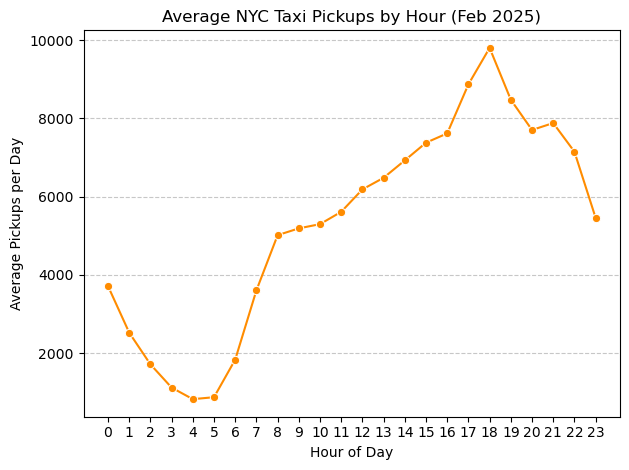

In [16]:
query = """
SELECT 
    CAST(pickup_hour AS INTEGER) AS pickup_hour,
    AVG(hourly_count) AS avg_pickups
FROM (
    SELECT 
        CAST(tpep_pickup_datetime AS DATE) AS pickup_date,
        strftime(tpep_pickup_datetime, '%H') AS pickup_hour,
        COUNT(*) AS hourly_count
    FROM 'yellow_tripdata_2025-02.parquet'
    GROUP BY pickup_date, pickup_hour
)
GROUP BY pickup_hour
ORDER BY pickup_hour
"""
avg_pickups_by_hour = duckdb.query(query).to_df()

sns.lineplot(
    data=avg_pickups_by_hour,
    x='pickup_hour',
    y='avg_pickups',
    marker='o',
    color='darkorange'
)

plt.title('Average NYC Taxi Pickups by Hour (Feb 2025)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pickups per Day')
plt.xticks(range(0, 24))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

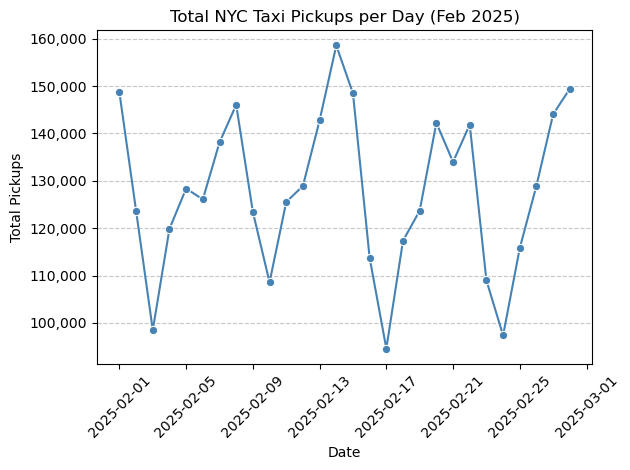

In [17]:
query = """
SELECT 
    CAST(tpep_pickup_datetime AS DATE) AS pickup_date,
    COUNT(*) AS total_pickups
FROM 'yellow_tripdata_2025-02.parquet'
GROUP BY pickup_date
ORDER BY pickup_date
"""

daily_pickups = duckdb.query(query).to_df()
daily_pickups = daily_pickups.iloc[1:-1]

sns.lineplot(
    data=daily_pickups,
    x='pickup_date',
    y='total_pickups',
    marker='o',
    color='steelblue'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

plt.title('Total NYC Taxi Pickups per Day (Feb 2025)')
plt.xlabel('Date')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
